# Dogs vs Cats
**End to End Image Classification project using TensorFlow**

In [2]:
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D,Flatten,Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.optimizers import Adam,Adadelta,RMSprop
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model, load_model

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/cat_dog.gif" width="750" align="center">

In [1]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2021-03-14 23:32:08--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.240, 172.253.115.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   113MB/s    in 0.6s    

2021-03-14 23:32:08 (113 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [ ]:
!unzip cats_and_dogs_filtered.zip

In [4]:
!pip install split_folders

## Splitting folders
We will split the input in 3 different dataset: train, val, test

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/splitting_folder.png" width="450" align="center">

In [4]:
import splitfolders
input_folder = 'cats_and_dogs_filtered/train/'
output_folder = 'data/'

In [5]:
splitfolders.ratio(input_folder,output_folder,seed=667,ratio=(.6,.2,.2))

Copying files: 2000 files [00:00, 8120.08 files/s]


In [12]:
img_height, img_width = (150,150)
batch_size = 10

train_data_dir = 'data/train'
validation_data_dir = 'data/val'
test_data_dir = 'data/test'


<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/augmentation.png" width="800" align="center">

In [13]:
# DATA AUGMENTATION
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest',
                                    validation_split=0.4
                                    )

In [14]:
train_generator = train_datagen.flow_from_directory(
                train_data_dir,
                target_size = (img_height,img_width),
                batch_size = batch_size,
                class_mode = 'categorical',
                subset='training') # set a training data

valid_generator = train_datagen.flow_from_directory(
                validation_data_dir,
                target_size = (img_height,img_width),
                batch_size = batch_size,
                class_mode = 'categorical',
                subset='validation') # set a validation data

test_generator = train_datagen.flow_from_directory(
                test_data_dir,
                target_size = (img_height,img_width),
                batch_size = 1,
                class_mode = 'categorical',
                subset='validation') # set a test data

Found 720 images belonging to 2 classes.
Found 160 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [15]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [16]:
# Struttura della nostra Neural Network

model = tf.keras.models.Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))

# Output layer - Number neuron == number classes
model.add(Dense(2, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',
              #optimizer=RMSprop(lr=1e-4),
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [19]:
history = model.fit(
      train_generator,
      epochs=20,
      validation_data=valid_generator,
      )

Epoch 1/20
72/72 [==============================] - 39s 91ms/step - loss: 0.6962 - accuracy: 0.4940 - val_loss: 0.6825 - val_accuracy: 0.6000
Epoch 2/20
72/72 [==============================] - 6s 90ms/step - loss: 0.6871 - accuracy: 0.5420 - val_loss: 0.6818 - val_accuracy: 0.5375
Epoch 3/20
72/72 [==============================] - 6s 89ms/step - loss: 0.6824 - accuracy: 0.5408 - val_loss: 0.6581 - val_accuracy: 0.6000
Epoch 4/20
72/72 [==============================] - 6s 89ms/step - loss: 0.6735 - accuracy: 0.6014 - val_loss: 0.6565 - val_accuracy: 0.6562
Epoch 5/20
72/72 [==============================] - 6s 90ms/step - loss: 0.6674 - accuracy: 0.5937 - val_loss: 0.6597 - val_accuracy: 0.5875
Epoch 6/20
72/72 [==============================] - 6s 89ms/step - loss: 0.6591 - accuracy: 0.6118 - val_loss: 0.6344 - val_accuracy: 0.6500
Epoch 7/20
72/72 [==============================] - 6s 89ms/step - loss: 0.6537 - accuracy: 0.5930 - val_loss: 0.6852 - val_accuracy: 0.5562
Epoch 8/20
7

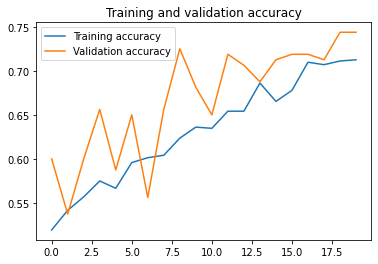

In [20]:
 import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

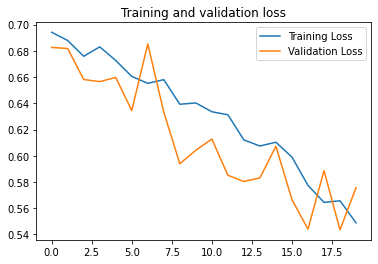

In [21]:
plt.figure()

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [22]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy ', test_acc)

160/160 - 1s - loss: 0.5899 - accuracy: 0.7000

Test accuracy  0.699999988079071


In [23]:
model.save('model.h5')

## Label Test Data into Dataframe +  Prediction

In [32]:
import pandas as pd

model = load_model('model.h5')
filenames = test_generator.filenames
nb_samples = len(test_generator)

y_prob =[]
y_act = []
test_generator.reset()

for _ in range (nb_samples):
    X_test,y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(y_test)

#Categorical
predicted_class = [list(test_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(test_generator.class_indices.keys())[i.argmax()] for i in y_act]

# ##Binary
# predicted_class = [list(test_generator.class_indices.keys())[(np.where(i>0.5,1,0))] for i in y_prob]
# actual_class = [list(test_generator.class_indices.keys())[(np.where(i>0.5,1,0))] for i in y_act]

test_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T, 
                        columns=['predicted_class','actual_class'])
test_df

,predicted_class,actual_class
0,cats,cats
1,cats,cats
2,cats,cats
3,dogs,dogs
4,cats,cats
...,...,...
155,dogs,cats
156,cats,dogs
157,cats,dogs
158,cats,cats


In [33]:
test_df1 = test_df.head(50)
## Prendo un sample delle prime 50 immagini predette sul test set

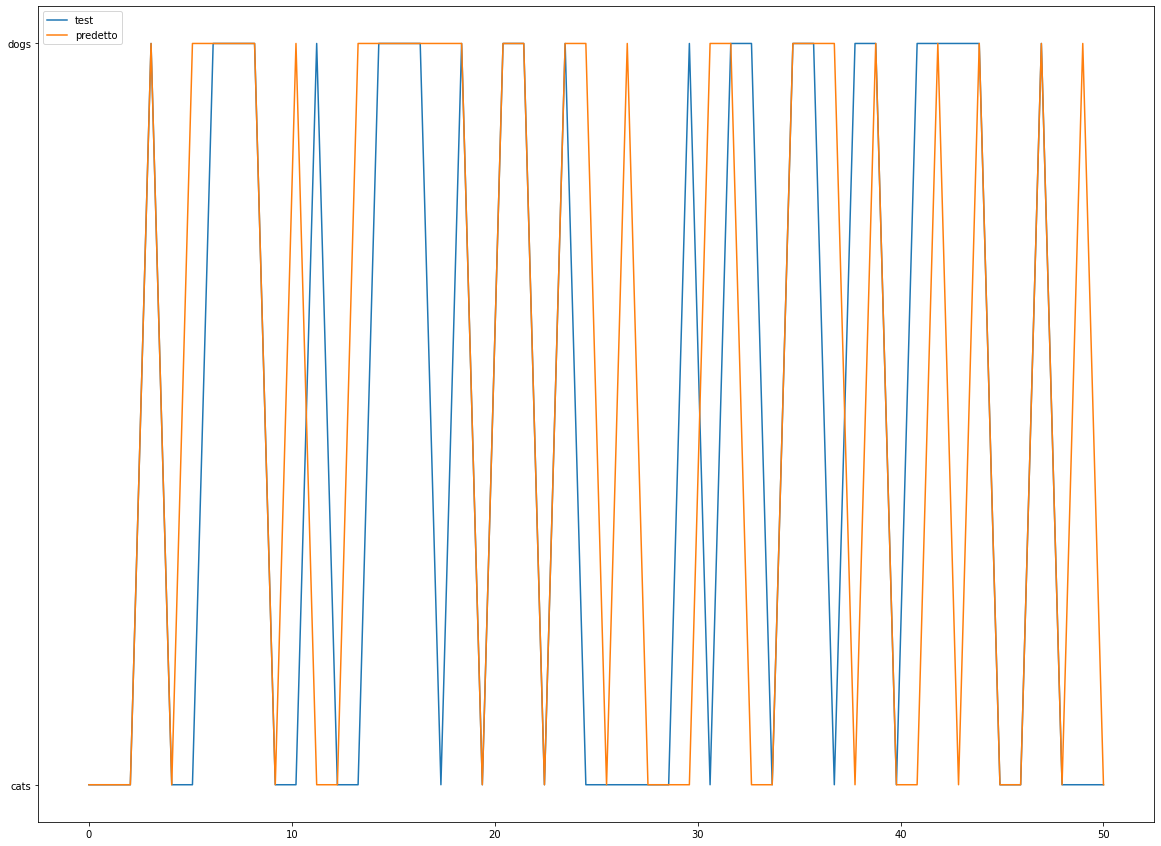

In [34]:
length = test_df1.shape[0] # 30 
x = np.linspace(0,length,length)


plt.figure(figsize=(20,15))
plt.plot(x, test_df1.actual_class, label='test')
plt.plot(x, test_df1.predicted_class, label='predetto')
plt.legend(loc=2);

In [35]:
cm = pd.crosstab(test_df['actual_class'],test_df['predicted_class'],
                rownames = ['Actual'],colnames = ['Predicted'])

# Confusion Matrix

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/cf_dog.jpg" width="800" align="center">

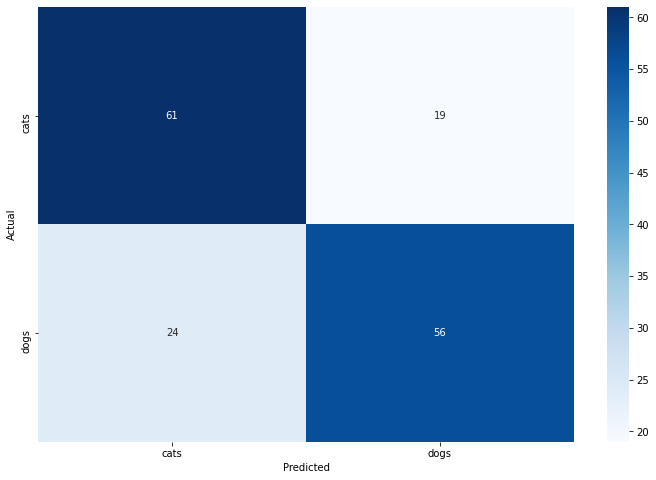

In [36]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(cm, cmap='Blues',annot=True);

## Classification Report

In [37]:
from sklearn.metrics import classification_report
print(classification_report(test_df['actual_class'],test_df['predicted_class']))

              precision    recall  f1-score   support

        cats       0.72      0.76      0.74        80
        dogs       0.75      0.70      0.72        80

    accuracy                           0.73       160
   macro avg       0.73      0.73      0.73       160
weighted avg       0.73      0.73      0.73       160



## Testing with New Data

In [38]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

classes = {0:"cat",
           1:"dog",}

for i in uploaded.keys():
    # predicting images
    path = '/content/' + i
    #resize to the right input format
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    pred = model.predict(images)
    pred = np.where((pred)> 0.5, 1, 0)[0][0]
    res = classes[pred]
    print("class= "+str(pred),", it's a:",res)